In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Loading the dataset
df = pd.read_csv('athlete_events.csv')

# Displaying first 5 rows of the dataset
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# Shape of the dataset
print("Dataset contains", df.shape[0], "rows and", df.shape[1], "columns.")

# General information
df.info()

# Checking for missing values
df.isnull().sum()


Dataset contains 192306 rows and 15 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192306 entries, 0 to 192305
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      192306 non-null  int64  
 1   Name    192306 non-null  object 
 2   Sex     192306 non-null  object 
 3   Age     185576 non-null  float64
 4   Height  149418 non-null  float64
 5   Weight  147362 non-null  float64
 6   Team    192306 non-null  object 
 7   NOC     192306 non-null  object 
 8   Games   192305 non-null  object 
 9   Year    192305 non-null  float64
 10  Season  192305 non-null  object 
 11  City    192305 non-null  object 
 12  Sport   192305 non-null  object 
 13  Event   192305 non-null  object 
 14  Medal   27839 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 22.0+ MB


,0
ID,0
Name,0
Sex,0
Age,6730
Height,42888
Weight,44944
Team,0
NOC,0
Games,1
Year,1


In [7]:
# Descriptive statistics
df.describe()

# Checking unique values in key columns
print("Unique sports:", df['Sport'].nunique())
print("Unique events:", df['Event'].nunique())
print("Unique athletes:", df['Name'].nunique())
print("Years covered:", sorted(df['Year'].unique()))


Unique sports: 65
Unique events: 763
Unique athletes: 95997
Years covered: [np.float64(1896.0), np.float64(1900.0), np.float64(1904.0), np.float64(1906.0), np.float64(1908.0), np.float64(1912.0), np.float64(1920.0), np.float64(1924.0), np.float64(1928.0), np.float64(1932.0), np.float64(1936.0), np.float64(1948.0), np.float64(1952.0), np.float64(1956.0), np.float64(1960.0), np.float64(1964.0), np.float64(1968.0), np.float64(1972.0), np.float64(1976.0), np.float64(1980.0), np.float64(1984.0), np.float64(1988.0), np.float64(1992.0), np.float64(1994.0), np.float64(1996.0), np.float64(1998.0), np.float64(2000.0), np.float64(2002.0), np.float64(2004.0), np.float64(2006.0), np.float64(2008.0), np.float64(2010.0), np.float64(2012.0), np.float64(2014.0), np.float64(2016.0), np.float64(nan)]


<ipython-input-8-4cab5194cff9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.values, y=top_sports.index, palette='viridis')


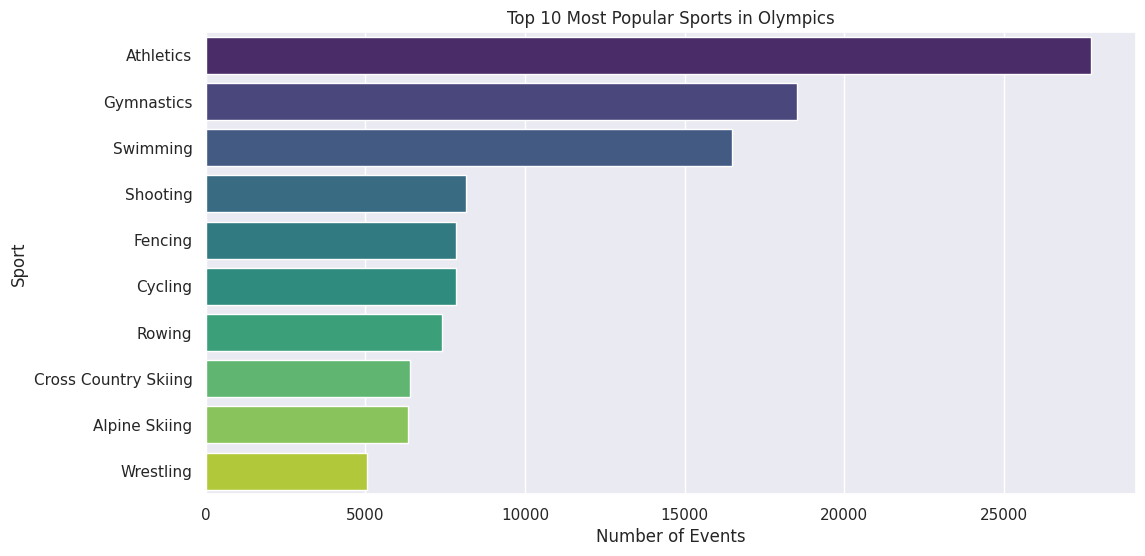

In [8]:
# Top 10 most popular sports
top_sports = df['Sport'].value_counts().head(10)

sns.barplot(x=top_sports.values, y=top_sports.index, palette='viridis')
plt.title("Top 10 Most Popular Sports in Olympics")
plt.xlabel("Number of Events")
plt.ylabel("Sport")
plt.show()


<ipython-input-9-e16de1941c4e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


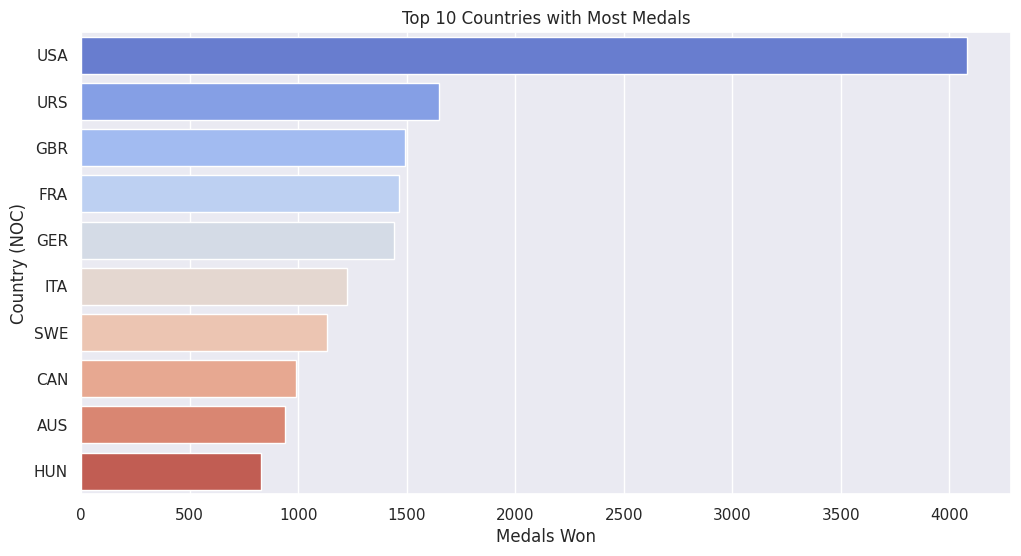

In [9]:
# Dropping NaN medals and grouping by country
medal_df = df.dropna(subset=['Medal'])
top_countries = medal_df['NOC'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries with Most Medals")
plt.xlabel("Medals Won")
plt.ylabel("Country (NOC)")
plt.show()


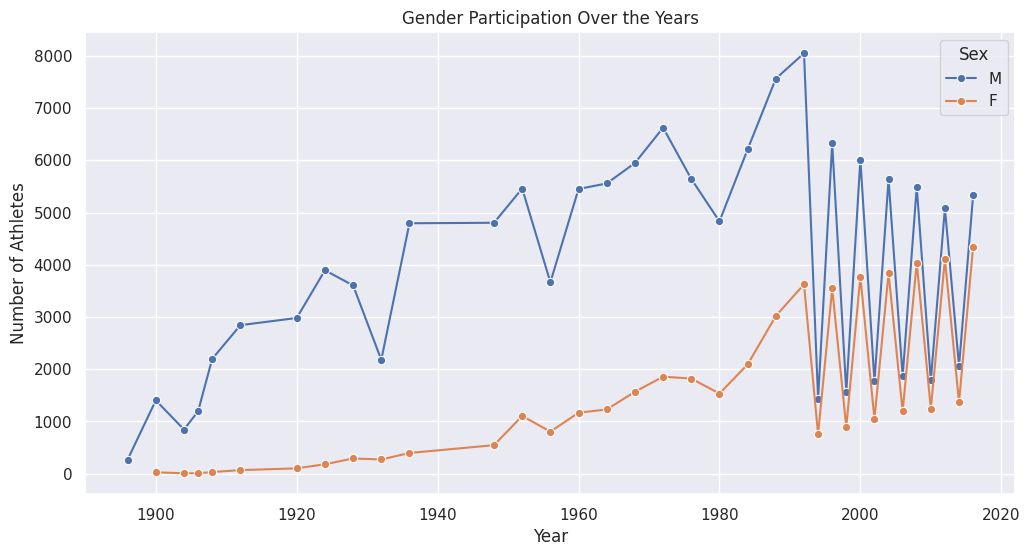

In [10]:
# Gender count over years
gender_year = df.groupby(['Year', 'Sex'])['ID'].count().reset_index()

sns.lineplot(data=gender_year, x='Year', y='ID', hue='Sex', marker='o')
plt.title("Gender Participation Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.show()


<ipython-input-11-ea71d8f5e468>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.values, y=top_sports.index, palette='viridis')


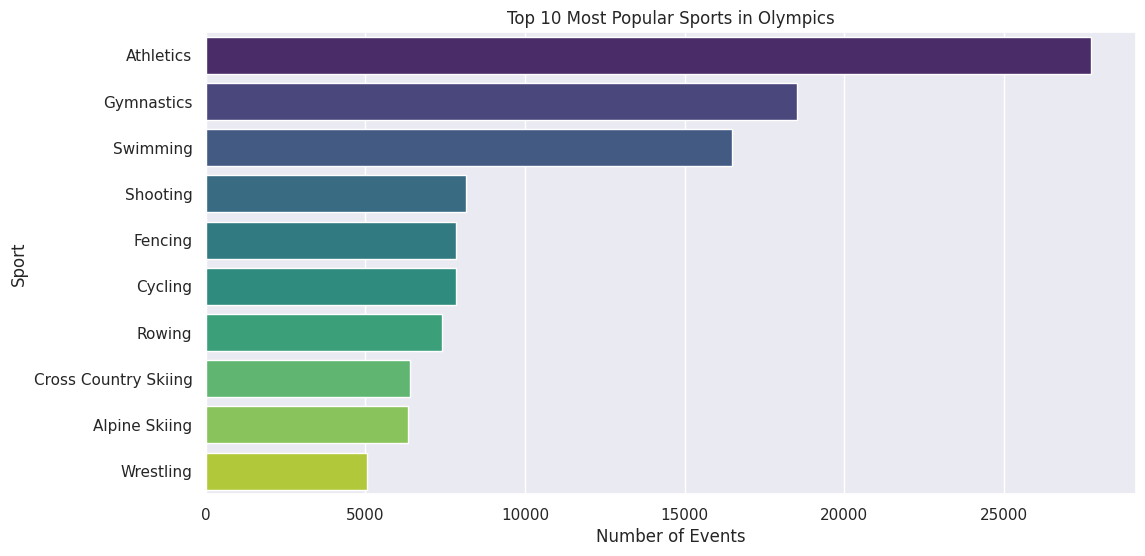

In [11]:
top_sports = df['Sport'].value_counts().head(10)

sns.barplot(x=top_sports.values, y=top_sports.index, palette='viridis')
plt.title("Top 10 Most Popular Sports in Olympics")
plt.xlabel("Number of Events")
plt.ylabel("Sport")
plt.show()


<ipython-input-12-870e41b8afc5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


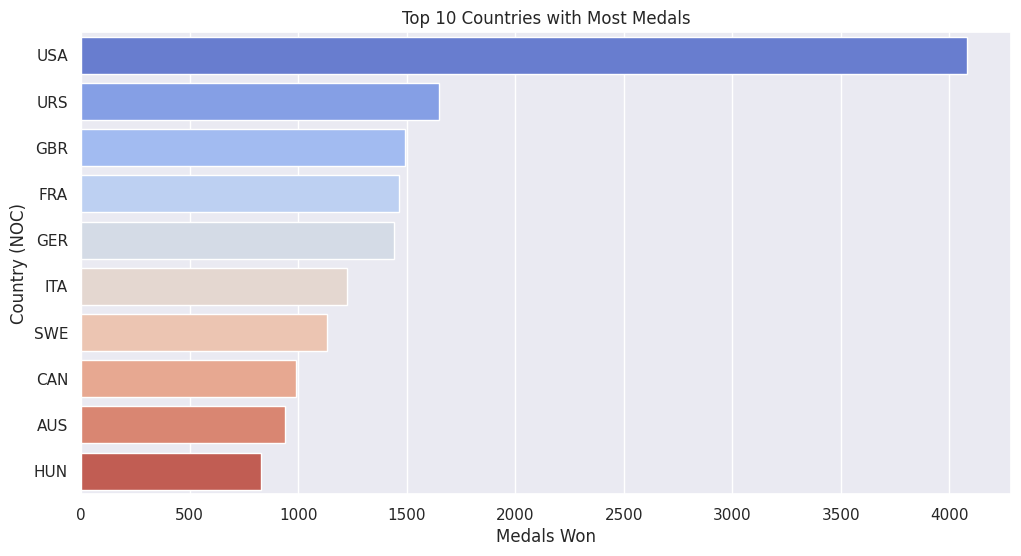

In [12]:
medal_df = df.dropna(subset=['Medal'])
top_countries = medal_df['NOC'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries with Most Medals")
plt.xlabel("Medals Won")
plt.ylabel("Country (NOC)")
plt.show()


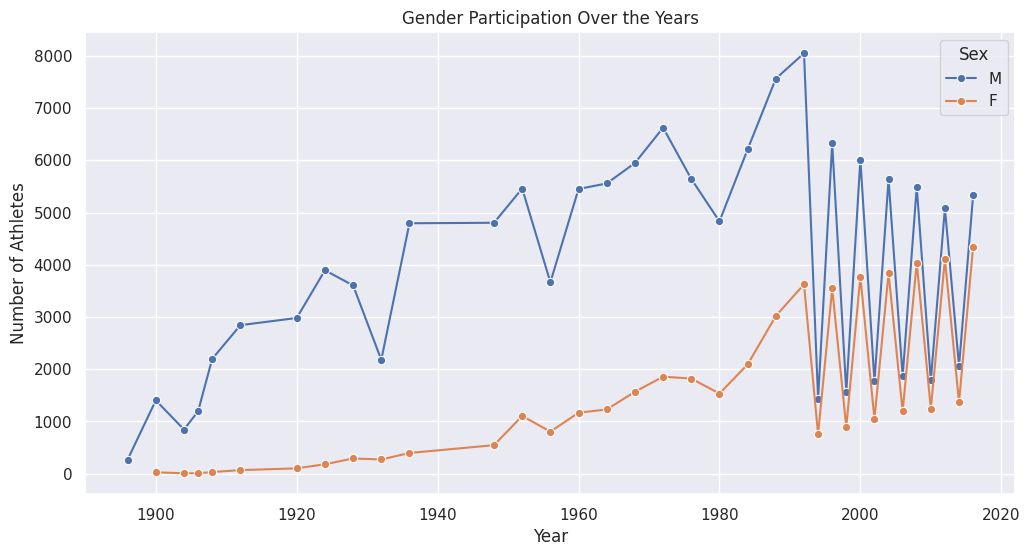

In [13]:
gender_year = df.groupby(['Year', 'Sex'])['ID'].count().reset_index()

sns.lineplot(data=gender_year, x='Year', y='ID', hue='Sex', marker='o')
plt.title("Gender Participation Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.show()


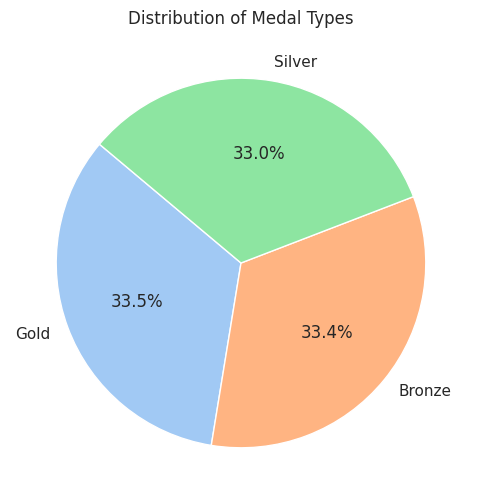

In [14]:
medal_counts = df['Medal'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribution of Medal Types")
plt.show()



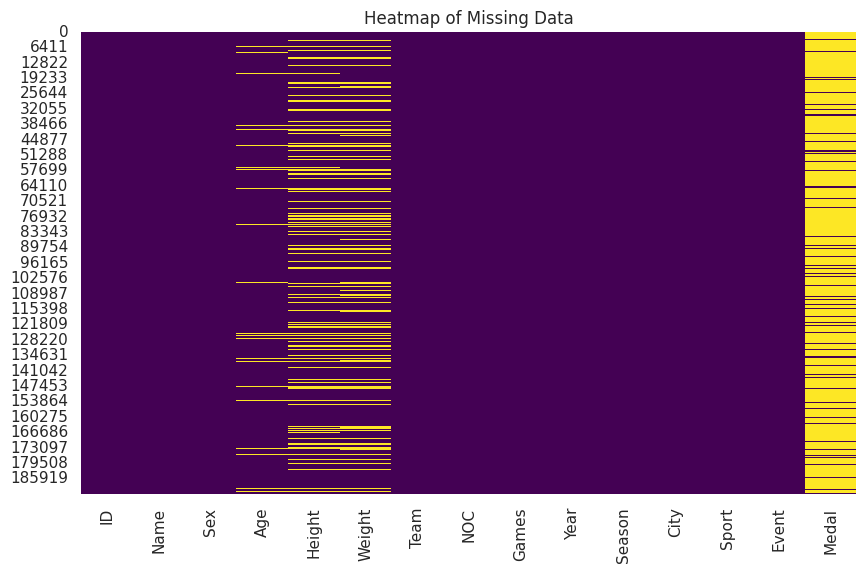

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Data")
plt.show()


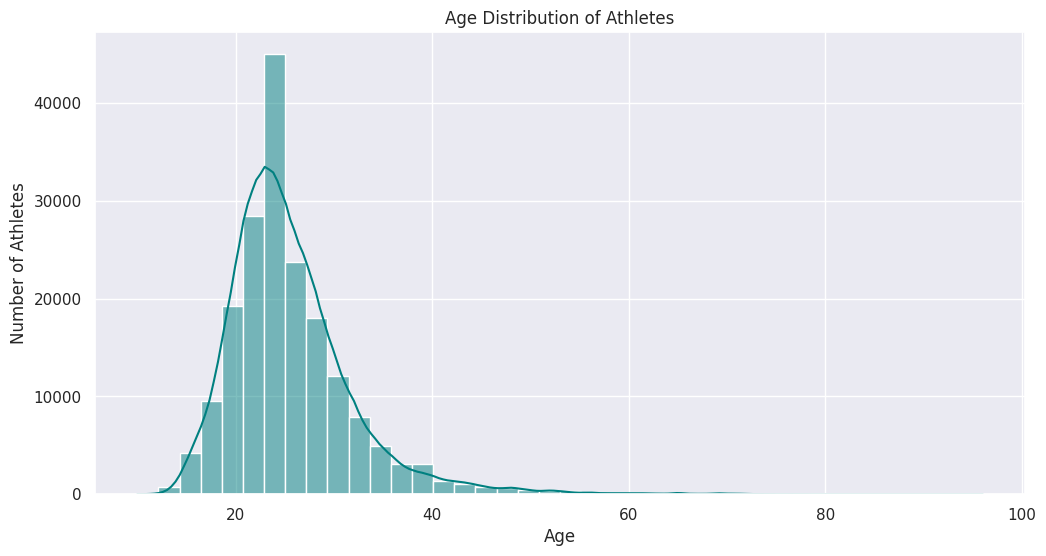

In [16]:
sns.histplot(df['Age'].dropna(), bins=40, kde=True, color='teal')
plt.title("Age Distribution of Athletes")
plt.xlabel("Age")
plt.ylabel("Number of Athletes")
plt.show()


<ipython-input-17-aa3f1b4548f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medal', y='Age', data=medal_df, palette='Set2')


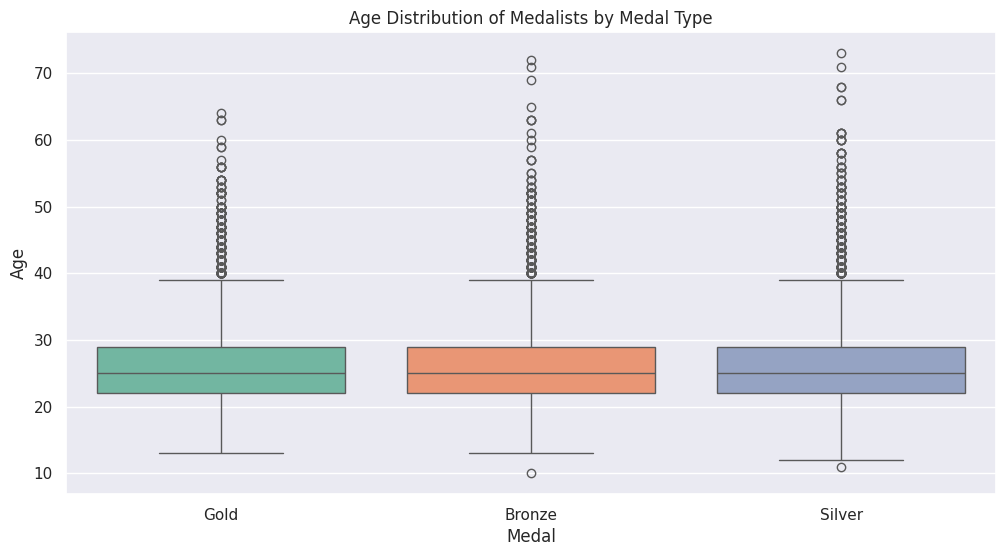

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medal', y='Age', data=medal_df, palette='Set2')
plt.title("Age Distribution of Medalists by Medal Type")
plt.show()


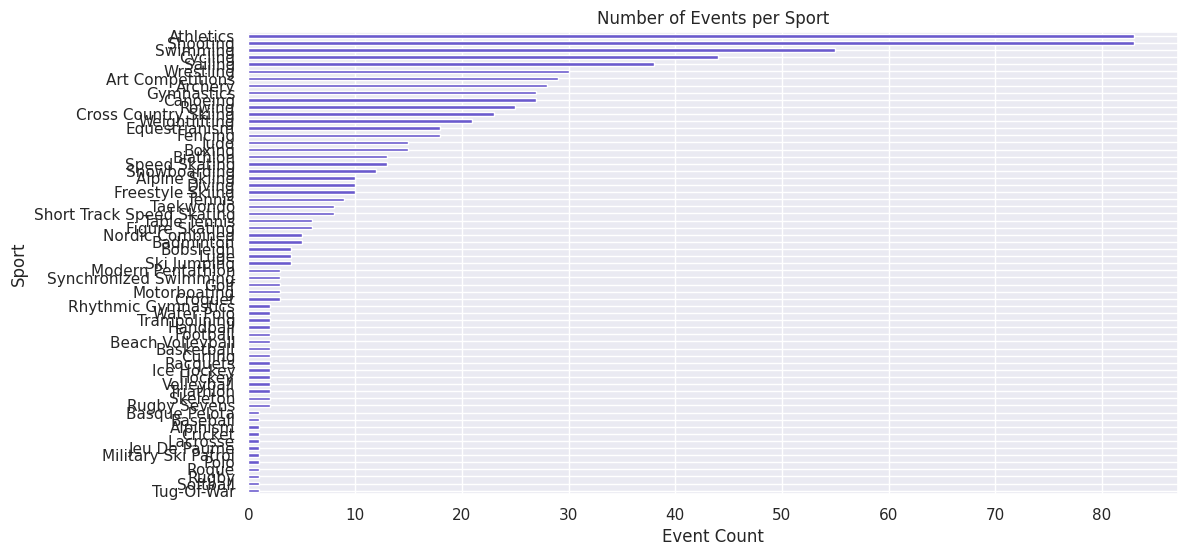

In [18]:
event_sport = df[['Sport', 'Event']].drop_duplicates().groupby('Sport')['Event'].count().sort_values(ascending=False)

event_sport.plot(kind='barh', color='slateblue')
plt.title("Number of Events per Sport")
plt.xlabel("Event Count")
plt.ylabel("Sport")
plt.gca().invert_yaxis()
plt.show()


<ipython-input-19-3e54a4688afb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_athletes.values, y=top_athletes.index, palette='mako')


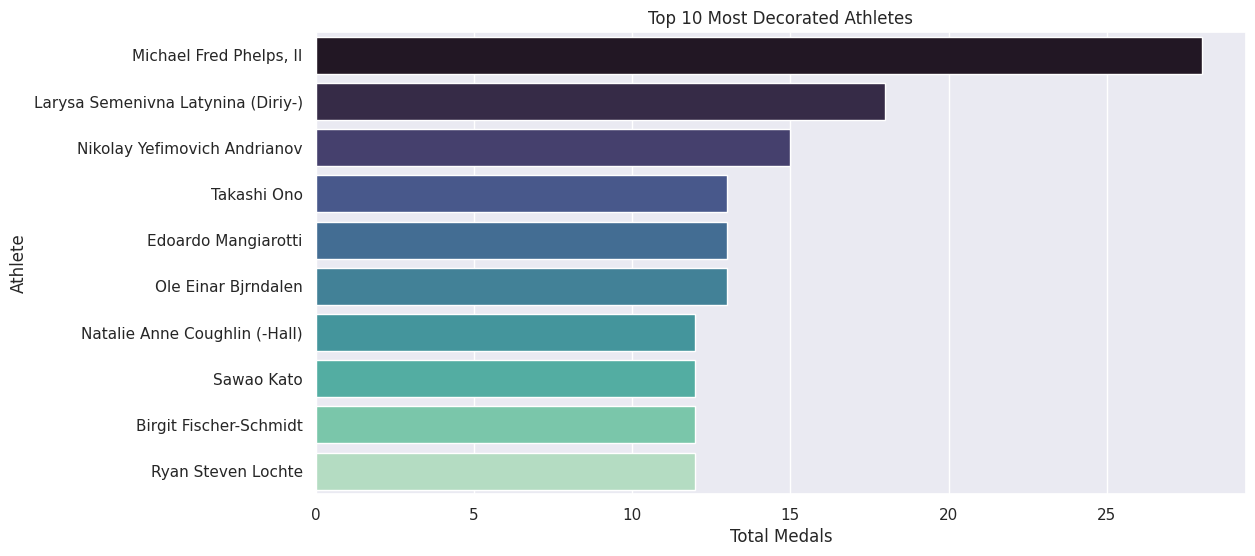

In [19]:
top_athletes = medal_df['Name'].value_counts().head(10)

sns.barplot(x=top_athletes.values, y=top_athletes.index, palette='mako')
plt.title("Top 10 Most Decorated Athletes")
plt.xlabel("Total Medals")
plt.ylabel("Athlete")
plt.show()


In [20]:
host_cities = df[['Year', 'City']].drop_duplicates().sort_values('Year')
host_cities.head(20)  # Display first 20 host entries


,Year,City
3079,1896.0,Athina
3,1900.0,Paris
711,1904.0,St. Louis
268,1906.0,Athina
1149,1908.0,London
35,1912.0,Stockholm
2,1920.0,Antwerpen
39,1924.0,Paris
672,1924.0,Chamonix
133,1928.0,Amsterdam


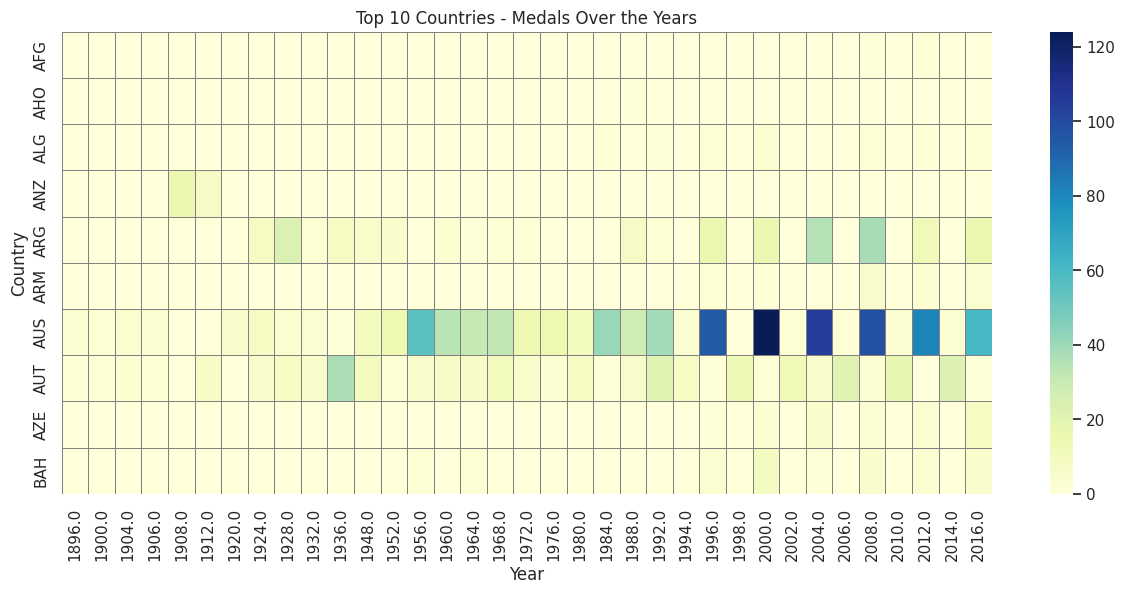

In [21]:
pivot = medal_df.pivot_table(index='NOC', columns='Year', values='Medal', aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot.head(10), cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Top 10 Countries - Medals Over the Years")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


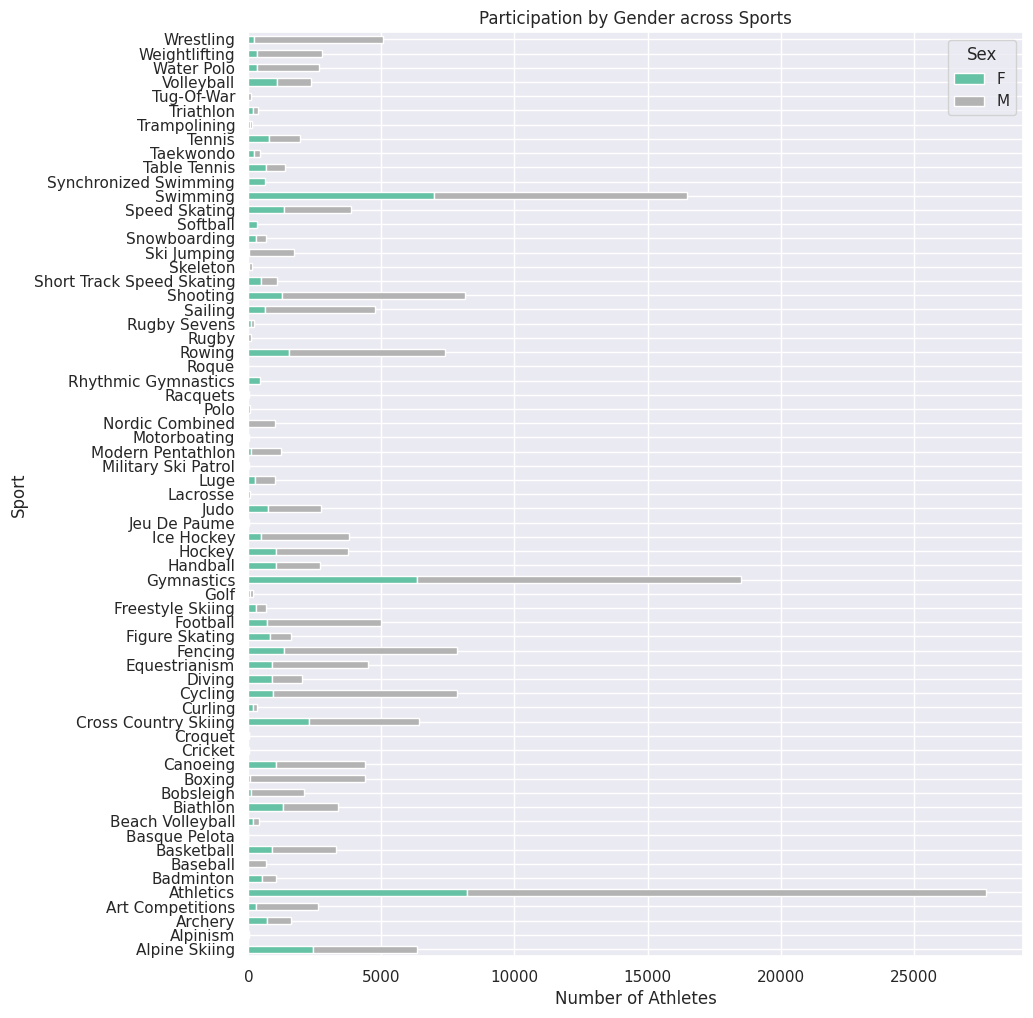

In [22]:
gender_sport = df.groupby(['Sport', 'Sex'])['ID'].count().unstack()

gender_sport.plot(kind='barh', stacked=True, figsize=(10, 12), colormap='Set2')
plt.title("Participation by Gender across Sports")
plt.xlabel("Number of Athletes")
plt.ylabel("Sport")
plt.show()
